# **Exercise 3** Two-qubit-gates, entanglement and oracles

<span style="color:red">**In preparation, not ready, yet!** </span>

## Exercise 3.1 - On a real quantum device

Run the circuit of exercise 2.5 on IBM's Q System One.

## Exercise 3.2 - CNOT gate

1. Describe the behavior of the CNOT gate (aka CX gate).
2. Play around with the following quantum circuit. What is it doing? Why is it important?

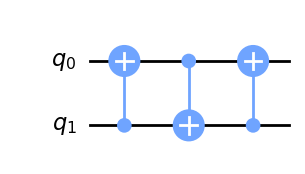

In [67]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)
qc.cx(1,0)
qc.cx(0,1)
qc.cx(1,0)
display(qc.draw(output='mpl'))

## Exercise 3.3 - Schrödinger's cats

[![](xkcd-45.jpg)](https://xkcd.com/45/) <sup>©[xkcd](https://xkcd.com)</sup>

You are in the quantum pet shop, located somewhere in superposition of Louisenstraße and Alaunstraße, Dresden-Neustadt. You are going to buy two of Schrödinger's cats. The salesperson offers you two bundles, each consisting of two boxes. Each box hosts a Schrödinger's cat. The cats of each bundle are in a composite quantum state, given by the circuit below (initialized by $\lvert 00\rangle$).

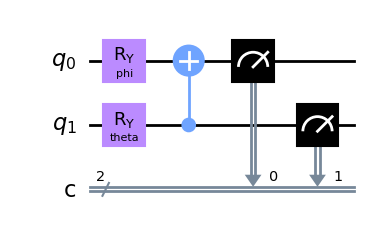

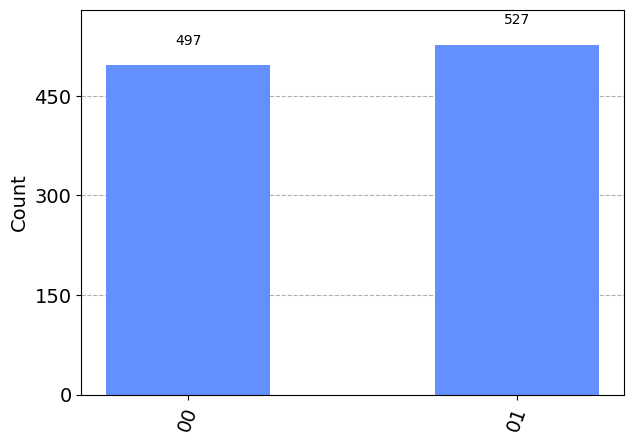

In [68]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import math

phi = Parameter('phi')
theta = Parameter('theta')

config_a = {phi: math.pi/2, theta: 0}
config_b = {phi: 0, theta: math.pi/2}

qc = QuantumCircuit(2,2)
qc.ry(phi, 0)
qc.ry(theta, 1)
qc.cx(1,0)


qc.measure([0,1], [0,1])

display(qc.draw(output='mpl'))

qc = qc.bind_parameters(config_a)

backend = AerSimulator(shots=1024)
job = backend.run(qc)
result = job.result()
counts = result.get_counts()

display(plot_histogram(counts))